In [15]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Ćwiczenie 1

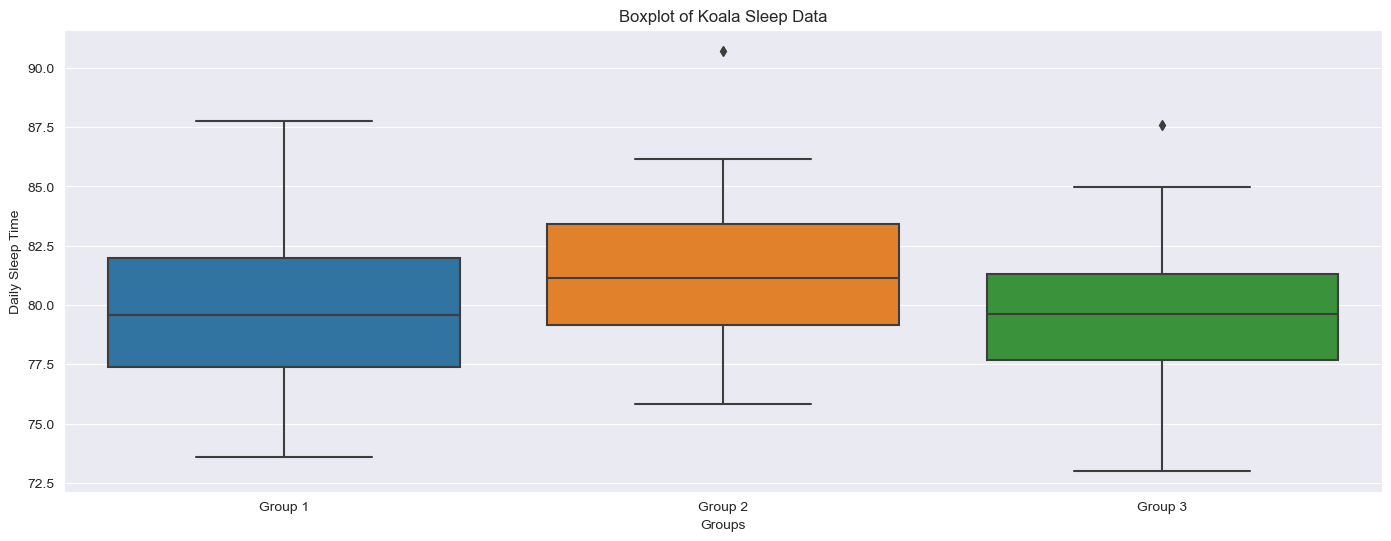

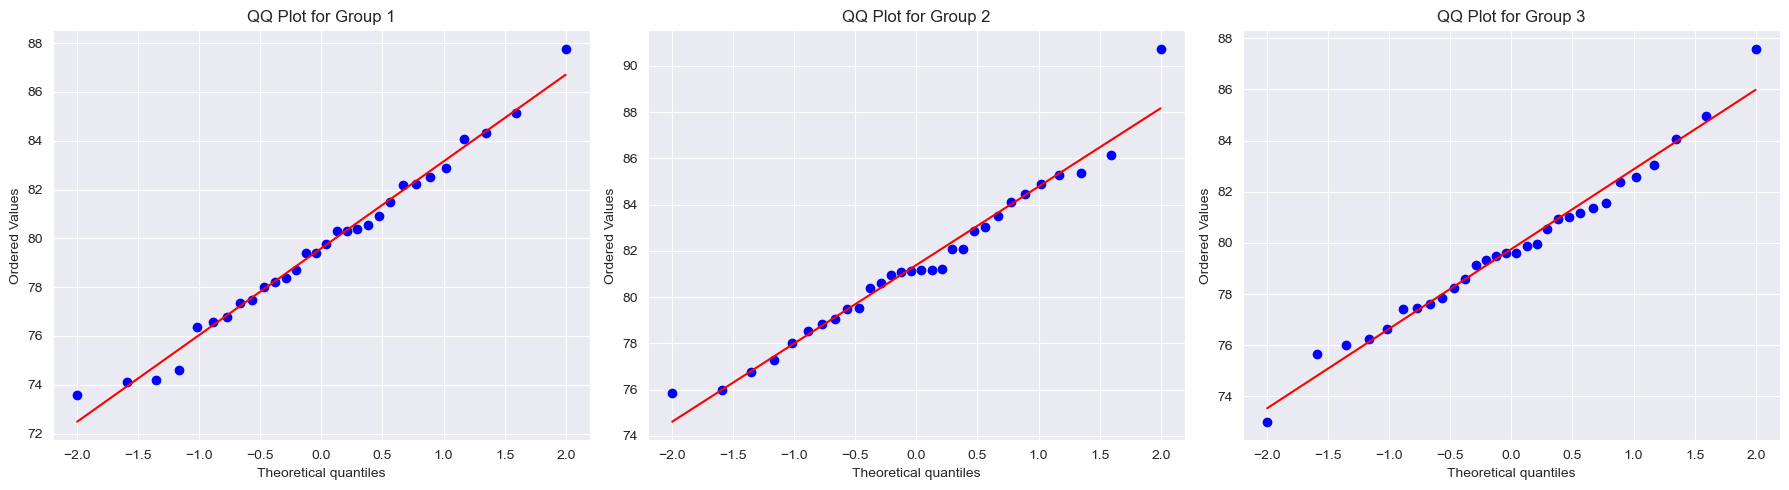


Wyniki testu Shapiro-Wilka dla normalności:
- Grupa 1: p-wartość = 0.9138
- Grupa 2: p-wartość = 0.5149
- Grupa 3: p-wartość = 0.9757

Normalność rozkładu grupy 1: nie została odrzucona
Normalność rozkładu grupy 2: nie została odrzucona
Normalność rozkładu grupy 3: nie została odrzucona

Wynik testu Levene'a na równość wariancji:
- P-wartość: 0.7115
Równość wariancji: nie została odrzucona

Wynik jednoczynnikowej analizy wariancji (ANOVA):
- Wartość statystyki testowej: 2.7570
- P-wartość: 0.0690

Interpretacja: Nie możemy odrzucić hipotezy zerowej o równości średnich; brak statystycznie istotnych różnic między grupami


In [14]:
file_path = 'data_6/anova_data.mat'
mat_data = scipy.io.loadmat(file_path)
koala_data = mat_data['koala']

plt.figure(figsize=(18, 5))
sns.boxplot(data=koala_data)
plt.title('Boxplot of Koala Sleep Data')
plt.xlabel('Groups')
plt.ylabel('Daily Sleep Time')
plt.xticks(ticks=[0, 1, 2], labels=['Group 1', 'Group 2', 'Group 3'])
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i in range(koala_data.shape[1]):
    stats.probplot(koala_data[:, i], dist="norm", plot=axs[i])
    axs[i].set_title(f'QQ Plot for Group {i + 1}')
plt.tight_layout()
plt.show()

shapiro_test_1 = [stats.shapiro(koala_data[:, i]) for i in range(koala_data.shape[1])]
levene_test_1 = stats.levene(koala_data[:, 0], koala_data[:, 1], koala_data[:, 2])
anova_result_1 = stats.f_oneway(koala_data[:, 0], koala_data[:, 1], koala_data[:, 2])

alpha = 0.05
interpretacja_anova = ("Możemy odrzucić hipotezę zerową o równości średnich; istnieją statystycznie istotne różnice między grupami"
                       if anova_result_1.pvalue <= alpha
                       else "Nie możemy odrzucić hipotezy zerowej o równości średnich; brak statystycznie istotnych różnic między grupami")

interpretacja_shapiro = ["Normalność rozkładu grupy {0}: {1}".format(i + 1, "nie została odrzucona" if test.pvalue > alpha else "została odrzucona") for i, test in
                         enumerate(shapiro_test_1)]

interpretacja_levene = "Równość wariancji: {0}".format("nie została odrzucona" if levene_test_1.pvalue > alpha else "została odrzucona")

print(f"""
Wyniki testu Shapiro-Wilka dla normalności:
- Grupa 1: p-wartość = {shapiro_test_1[0].pvalue:.4f}
- Grupa 2: p-wartość = {shapiro_test_1[1].pvalue:.4f}
- Grupa 3: p-wartość = {shapiro_test_1[2].pvalue:.4f}

{interpretacja_shapiro[0]}
{interpretacja_shapiro[1]}
{interpretacja_shapiro[2]}

Wynik testu Levene'a na równość wariancji:
- P-wartość: {levene_test_1.pvalue:.4f}
{interpretacja_levene}

Wynik jednoczynnikowej analizy wariancji (ANOVA):
- Wartość statystyki testowej: {anova_result_1.statistic:.4f}
- P-wartość: {anova_result_1.pvalue:.4f}

Interpretacja: {interpretacja_anova}
""")


# Ćwiczenie 2

ANOVA result:
F-statistic: 3.5664846248930004, p-value: 0.04338747516521317

Ponieważ p-value z ANOVA jest mniejsze niż 0.05, przeprowadzamy test post-hoc Tukeya HSD.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   4.2893 0.0339  0.2885   8.29   True
     1      3   1.8519 0.4511 -1.9201 5.6239  False
     2      3  -2.4374    0.3 -6.4381 1.5634  False
---------------------------------------------------


<Figure size 1800x500 with 0 Axes>

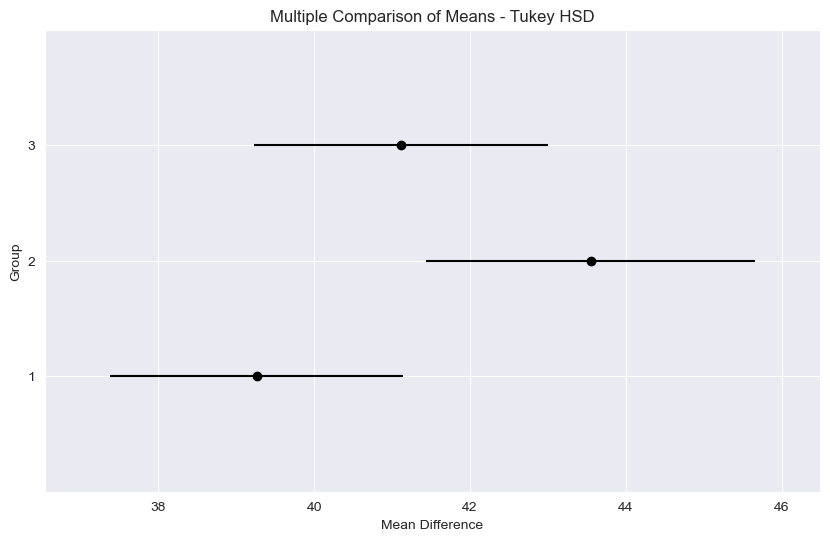

In [22]:
wombats_data = mat_data['wombats']
wombat_groups = mat_data['wombat_groups'].flatten()

anova_result = stats.f_oneway(*(wombats_data[:, wombat_groups == group].flatten() for group in np.unique(wombat_groups)))

print(f"ANOVA result:\nF-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}\n")

if anova_result.pvalue < 0.05:
    print("Ponieważ p-value z ANOVA jest mniejsze niż 0.05, przeprowadzamy test post-hoc Tukeya HSD.\n")

    data_flat = wombats_data.flatten()
    groups_flat = np.repeat(np.unique(wombat_groups), repeats=[sum(wombat_groups == group) for group in np.unique(wombat_groups)])

    tukey_result = pairwise_tukeyhsd(endog=data_flat, groups=groups_flat, alpha=0.05)

    print(tukey_result)
    plt.figure(figsize=(18, 5))
    tukey_result.plot_simultaneous(xlabel='Mean Difference', ylabel='Group')
    plt.title('Multiple Comparison of Means - Tukey HSD')
    plt.grid(True)
    plt.show()

else:
    print("Brak statystycznie istotnych różnic między grupami.")
# czyli istnieje znacząca różnica pomiędzy 1 i 2 grupą, 

# Ćwiczenie 3